In [59]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%matplotlib inline

In [60]:
#%config InlineBackend.close_figures=False # tell pyplot not to close figures
#np.warnings.filterwarnings('ignore') # silence numpy warning

In [61]:
# path to netcdf file
f = r'\\SFP.IDIR.BCGOV\U164\MLABIADH$\Profile\Desktop\TRAINING\RS\NetCDF\precip.comb.v2018to2016-v6monitorafter.total.nc'

In [62]:
# open netcdf file
ds = xr.open_dataset(f)
ds.dims

Frozen({'lat': 180, 'lon': 360, 'time': 1548})

In [63]:
# explore variables
ds.var

<bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 1548)
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 1891-01-01 1891-02-01 ... 2019-12-01
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    Original_Source:  http://www.dwd.de/en/FundE/Klima/KLIS/int/GPCC/GPCC.htm...
    Reference:        Users of the data sets are kindly requested to give fee...
    original_source:  ftp://ftp-anon.dwd.de/pub/data/gpcc/html/download_gate....
    Conventions:      CF 1.0
    dataset_title:    Global Precipitation Climatology Centre (GPCC)
    title:            GPCC Full Data Reanalysis Version 2018 1.0x1.0 Monthly ...
    history:          Created 09/2018  based on V2018 data obtained via ftp
    References:       https://www.psl.noaa.go

In [74]:
# ewxplore precipitation variable
prec = ds.precip
prec

<xarray.DataArray 'precip' (time: 1548, lat: 180, lon: 360)>
[100310400 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 1891-01-01 1891-02-01 ... 2019-12-01
Attributes:
    long_name:     GPCC Monthly total of precipitation
    statistic:     Total
    valid_range:   [   0. 8000.]
    parent_stat:   Observations
    var_desc:      Precipitation
    units:         mm
    level:         Surface
    actual_range:  [   0.   3349.61]
    dataset:       GPCC Precipitation 1.0degree V2018 Full Reanalysis

In [75]:
# extract specific date
oct2018 = prec.sel(time='2018-10-01')
oct2018

<xarray.DataArray 'precip' (lat: 180, lon: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
    time     datetime64[ns] 2018-10-01
Attributes:
    long_name:     GPCC Monthly total of precipitation
    statistic:     Total
    valid_range:   [   0. 8000.]
    parent_stat:   Observations
    var_desc:      Precipitation
    units:         mm
    level:         Surface
    actual_range:  [   0.   3349.61]
    dataset:       GPCC Precipitation 1.0degree V2018 Full Reanalysis

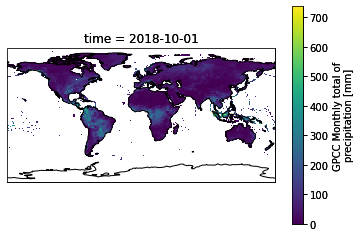

In [76]:
# plot data

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines() 
oct2018.plot()
plt.show()

In [96]:
# extract oct 2018 precipitation in British Columbia
bc_oct2018_prec = oct2018.where((oct2018.lat > 45) & 
                                (oct2018.lat < 70) & 
                                (oct2018.lon > -137+180) & # add 180 to convert longs from (-180, 180) to (0, 360)
                                (oct2018.lon < -114+180),
                                drop=True)

In [98]:
df = bc_oct2018_prec.to_dataframe()
df

time  precip
lat  lon                    
69.5 43.5 2018-10-01     NaN
     44.5 2018-10-01     NaN
     45.5 2018-10-01     NaN
     46.5 2018-10-01     NaN
     47.5 2018-10-01     NaN
...              ...     ...
45.5 61.5 2018-10-01   11.05
     62.5 2018-10-01    8.72
     63.5 2018-10-01    6.59
     64.5 2018-10-01    5.61
     65.5 2018-10-01    7.65

[575 rows x 2 columns]